## **PEMODELAN DATA**

---


In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## 1. Persiapan Dataset

In [54]:
import pandas as pd

file_path = '../05. Pra-pemrosesan Data (Data Preprocessing)/Dataset_Clean/Dataset_clean2.csv'

data = pd.read_csv(file_path)

print(data.head())


   Unnamed: 0                                              tweet  label
0         944  ['eh', 'kok', 'papa', 'kenal', 'namira', 'liha...  Anger
1         945  ['risih', 'tidak', 'suka', 'sekali', 'soalnya'...  Anger
2         946  ['pas', 'sma', 'tidak', 'pernah', 'bawa', 'uan...  Anger
3         947  ['sayang', 'tidak', 'suka', 'ya', 'kalau', 'si...  Anger
4         948  ['aga', 'emosi', 'ingin', 'datengin', 'ksy', '...  Anger


## 2. Preprocessing Data

In [55]:
print(data['label'].value_counts())

label
Joy        9999
Anger      9056
Sad        9003
Fear       6687
Love       6071
Neutral    6037
Name: count, dtype: int64


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Misalkan data memiliki kolom 'tweet' dan 'labels'
tweets = data['tweet']
labels = data['label']

# Mengonversi label menjadi angka
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Membagi data menjadi training dan sisanya (testing + validation)
X_train, X_temp, y_train, y_temp = train_test_split(tweets, labels_encoded, test_size=0.4, random_state=42)

# Membagi sisa data menjadi testing dan validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [57]:
print(label_encoder.classes_)

['Anger' 'Fear' 'Joy' 'Love' 'Neutral' 'Sad']


In [58]:

print("Training data:", len(X_train))
print("Testing data:", len(X_test))
print("Validation data:", len(X_val))

Training data: 28111
Testing data: 9371
Validation data: 9371


In [59]:
X_train

29651    ['betul', 'mas', 'sayapun', 'kecewa', 'karena'...
36581    ['pesan', 'delivery', 'saja', 'kasihan', 'peru...
39999    ['diucapin', 'joy', 'birthday', 'sama', 'bapak...
29611    ['sekarang', 'saya', 'tidak', 'bisa', 'lagi', ...
33233    ['begitu', 'diumumkan', 'lulus', 'mereka', 'se...
                               ...                        
11284    ['hayuk', 'ah', 'ikut', 'biar', 'ramai', 'liat...
44732          ['suka', 'sekali', 'sama', 'energi', 'ini']
38158    ['menyembuhkan', 'sakit', 'tidak', 'mesti', 'p...
860      ['kaget', 'kirain', 'bakal', 'zonk', 'ehh', 's...
15795    ['banyak', 'sebenarnya', 'yang', 'mau', 'saya'...
Name: tweet, Length: 28111, dtype: object

In [60]:
X_test

1824                         ['alhamdulillah', 'semangat']
10250    ['thread', 'ini', 'dipersembahkan', 'oleh', 'w...
7122     ['ibuqu', 'suka', 'sangat', 'teriak', 'bercand...
38383    ['jadi', 'takut', 'saya', 'sering', 'foto', 'a...
23578    ['kalau', 'tidak', 'tahu', 'ceritanya', 'mendi...
                               ...                        
825      ['kaget', 'sangat', 'tbtb', 'mas', 'crush', 'n...
42491    ['agak', 'telat', 'ramai', 'nya', 'ya', 'dok',...
9935     ['saya', 'kira', 'dengan', 'saya', 'datang', '...
29080    ['semoga', 'alloh', 'meridhoi', 'niat', 'kita'...
16714                           ['ngeri', 'sangat', 'sih']
Name: tweet, Length: 9371, dtype: object

In [61]:
X_val

29676    ['yang', 'repot', 'itu', 'kalau', 'sekedar', '...
6232     ['saya', 'dulu', 'temu', 'ig', 'nya', 'dia', '...
26787    ['liga', 'bangke', 'memang', 'ini', 'liga', 'i...
27547    ['begitulah', 'mereka', 'benar', 'kata', 'pepa...
36353    ['lalu', 'bagaimana', 'dengan', 'negara', 'mer...
                               ...                        
13925    ['bodoamat', 'deh', 'kuping', 'saya', 'paginya...
8042     ['pacaran', 'sama', 'yang', 'kerjanya', 'sama'...
4785     ['huhu', 'jiheon', 'graduation', 'yaabakalan',...
22910    ['titalia', 'kenapa', 'dia', 'cantik', 'sekali...
309      ['dirumahku', 'yang', 'kena', 'umicron', 'suda...
Name: tweet, Length: 9371, dtype: object

## 3. Transform Data

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenisasi data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = 64 # Panjang maksimum dari sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Mengubah label menjadi tipe numerik
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


In [63]:
print("X train pad :", X_train_pad)
print("X val pad :", X_val_pad)
print("X test pad :", X_test_pad)

X train pad : [[   0    0    0 ...  143  874  663]
 [   0    0    0 ...    9  343 4261]
 [   0    0    0 ...  366  141 1088]
 ...
 [   0    0    0 ...   41 2592 3543]
 [   0    0    0 ... 2606   36  191]
 [   0    0    0 ...  513 8052 3795]]
X val pad : [[   0    0    0 ... 1522   10 3863]
 [   0    0    0 ...   20  536   35]
 [   0    0    0 ...  132  132   30]
 ...
 [   0    0    0 ...   79  118   18]
 [   0    0    0 ...   23 1262   16]
 [   0    0    0 ...    6  398   31]]
X test pad : [[   0    0    0 ...    0  204   73]
 [   0    0    0 ...   14    2 9703]
 [   0    0    0 ...  194  194   49]
 ...
 [   0    0    0 ...   77 2704 1245]
 [   0    0    0 ...  390   15 4200]
 [   0    0    0 ...  208   35   41]]


## 4. Build and Compile Model

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Definisi model LSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))  
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [65]:
model.fit(X_train_pad, y_train, epochs=1, validation_data=(X_val_pad, y_val))

879/879 ━━━━━━━━━━━━━━━━━━━━ 71s 70ms/step - accuracy: 0.4995 - loss: 1.2619 - val_accuracy: 0.8581 - val_loss: 0.4520


## 5. Evaluasi Model

In [66]:
# Evaluasi model dengan data testing
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", accuracy)


293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8610 - loss: 0.4337
Testing Accuracy: 0.8584996461868286


## 6. Perhitungan F1 Score

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi dengan data testing
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Menampilkan F1 Score secara manual
f1_score = report['weighted avg']['f1-score']
print("F1 Score:", f1_score)


293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
F1 Score: 0.8595841778343203


## 7. Confusion Matriks

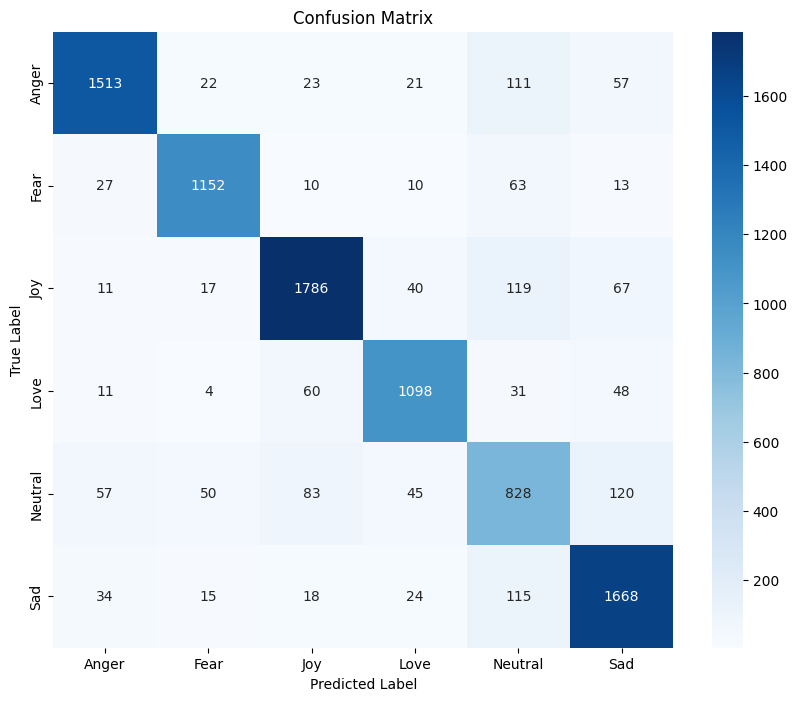

In [68]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## 8. Testing

In [77]:
tweets = [
    "Saya merasa sangat cemas tentang ujian besok",
    "Baru saja mendapatkan promosi di kantor! Sangat bahagia",
    "Saya suka menghabiskan waktu bersama keluarga di akhir pekan",
    "Merasa sedih hari ini, semuanya terasa sulit",
    "Hanya hari biasa tidak ada yang istimewa",
    "Saya sangat frustrasi dengan kemacetan hari ini!",
    "Pikiran untuk berbicara di depan umum selalu membuat saya takut.",
    "Bersenang-senang di pantai hari ini, sangat menyenangkan!",
    "Anjing saya adalah teman terbaik yang pernah saya miliki.",
    "Dompet saya hilang hari ini, merasa sangat sedih.",
    "Ini hanya hari Senin biasa, kembali bekerja.",
    "Saya tidak percaya betapa kasarnya beberapa orang!",
    "Berjalan sendirian di malam hari membuat saya sangat tidak nyaman.",
    "Makan malam terbaik bersama teman-teman, sangat banyak tawa!",
    "Tidak ada yang mengalahkan perasaan jatuh cinta.",
    "Ini hari hujan, membuat saya merasa sedikit muram.",
    "Tidak banyak yang terjadi hari ini, cukup tidak berkesan.",
    "Saya sangat marah dengan perlakuan tidak adil di tempat kerja!",
    "Film horor itu benar-benar menakutkan!",
    "Lulus hari ini, tidak bisa menggambarkan kebahagiaan!"
]

# Fungsi untuk mendapatkan label dari prediksi
def get_label(predict):
    if predict == 0:
        return 'anger'
    if predict == 1:
        return 'joy'
    if predict == 2:
        return 'fear'
    if predict == 3:
        return 'love'
    if predict == 4:
        return 'sad'
    if predict == 5:
        return 'neutral'

# Preprocess the tweets
max_length = 100  # Sesuaikan dengan panjang maksimum yang digunakan selama pelatihan
trunc_type = 'post'

# Tokenize and pad sequences
sample_seqs = tokenizer.texts_to_sequences(tweets)
sample_padded = pad_sequences(sample_seqs, maxlen=max_length, truncating=trunc_type)

# Predict labels for each tweet
predictions = model.predict(sample_padded)

# Print predictions and corresponding labels
for i, tweet in enumerate(tweets):
    prediction = np.argmax(predictions[i])
    label = get_label(prediction)
    print(f"Tweet: {tweet}\nPredicted label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Tweet: Saya merasa sangat cemas tentang ujian besok
Predicted label: sad

Tweet: Baru saja mendapatkan promosi di kantor! Sangat bahagia
Predicted label: fear

Tweet: Saya suka menghabiskan waktu bersama keluarga di akhir pekan
Predicted label: sad

Tweet: Merasa sedih hari ini, semuanya terasa sulit
Predicted label: sad

Tweet: Hanya hari biasa tidak ada yang istimewa
Predicted label: sad

Tweet: Saya sangat frustrasi dengan kemacetan hari ini!
Predicted label: sad

Tweet: Pikiran untuk berbicara di depan umum selalu membuat saya takut.
Predicted label: sad

Tweet: Bersenang-senang di pantai hari ini, sangat menyenangkan!
Predicted label: sad

Tweet: Anjing saya adalah teman terbaik yang pernah saya miliki.
Predicted label: sad

Tweet: Dompet saya hilang hari ini, merasa sangat sedih.
Predicted label: sad

Tweet: Ini hanya hari Senin biasa, kembali bekerja.
Predicted label: sad

Tweet: Saya tidak percaya betapa kasarnya beberapa orang!
Predicted 

In [70]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Baca data dari CSV
df = pd.read_csv('../02. Pengumpulan Data (Data Collection)/Dataset/NonLabel/masukan(to-vidio).csv')  # Ganti dengan path ke file CSV Anda

# Fungsi untuk mendapatkan label dari prediksi
def get_label(predict):
    if predict == 0:
        return 'anger'
    if predict == 1:
        return 'joy'
    if predict == 2:
        return 'fear'
    if predict == 3:
        return 'love'
    if predict == 4:
        return 'sad'
    if predict == 5:
        return 'neutral'

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=5000)  # Sesuaikan dengan jumlah kata yang digunakan selama pelatihan
tokenizer.fit_on_texts(df['full_text'].values)

# Preprocess the tweets
max_length = 100  # Sesuaikan dengan panjang maksimum yang digunakan selama pelatihan
trunc_type = 'post'

# Tokenize and pad sequences
sample_seqs = tokenizer.texts_to_sequences(df['full_text'].values)
sample_padded = pad_sequences(sample_seqs, maxlen=max_length, truncating=trunc_type)

# Predict labels for each tweet
predictions = model.predict(sample_padded)

# Tambahkan kolom 'emotion' ke DataFrame
df['emotion'] = [get_label(np.argmax(predictions[i])) for i in range(len(predictions))]

# Simpan DataFrame yang sudah diperbarui ke CSV baru
df.to_csv('Data Done Label_file.csv', index=False)  # Ganti dengan path untuk menyimpan file CSV yang diperbarui

print("Klasifikasi selesai dan disimpan ke file CSV baru.")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Klasifikasi selesai dan disimpan ke file CSV baru.
